In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.neighbors import KNeighborsClassifier
import time

import seaborn as sns
from matplotlib import rc
rc('text', usetex=True)
rc('font',family='serif')

import sys
sys.path.insert(0, '../')
import dataClassification as lcd

import csv
from sklearn.metrics import confusion_matrix

In [2]:
def InfoDataset(dataset):
    name     = dataset['name']
    xtrain   = dataset['xtrain']
    ytrain   = dataset['ytrain']
    Ntrain   = dataset['Ntrain']
    xtest    = dataset['xtest']
    ytest    = dataset['ytest']
    Ntest    = dataset['Ntest']
    Nsample  = dataset['Nsample']
    print('dataset      :',name, '\nsize         : {:d}\ntrain/test   : {:d}/{:d} ({:.1f}/{:.1f})'.format( \
            Nsample, Ntrain, Ntest, 100*Ntrain/Nsample, 100*Ntest/Nsample))
    
def InfoPrinter(dataset, model):
    InfoDataset(dataset)
    print('K            : {:d}\nscore        : {:.3f}'.format(K, model.score(xtest, ytest)))

## Simple test on the three dataset using K=5

In [3]:
test_ratio   = 0.3
seed         = -1 # -1 to switch-off the seeding
K            = 5
datasets     = ['iris', 'glass', 'realistic_fake']

for dataset_name in datasets:
    dataset  = lcd.LoadData(dataset_name, test_ratio=test_ratio, seed=seed) 
    xtrain   = dataset['xtrain']
    ytrain   = dataset['ytrain']
    xtest    = dataset['xtest']
    ytest    = dataset['ytest']
    neigh    = KNeighborsClassifier(n_neighbors=K)
    neigh.fit(xtrain, ytrain)
    print('--------------------------------------------')
    InfoPrinter(dataset, neigh)

--------------------------------------------
dataset      : iris 
size         : 150
train/test   : 105/45 (70.0/30.0)
K            : 5
score        : 0.932
--------------------------------------------
dataset      : glass 
size         : 214
train/test   : 149/65 (69.6/30.4)
K            : 5
score        : 0.984
--------------------------------------------
dataset      : realistic_fake 
size         : 1000
train/test   : 700/300 (70.0/30.0)
K            : 5
score        : 0.926


## Test using different values of K for iris and mutually_exclusive

--------------------------------------------
dataset      : iris 
size         : 150
train/test   : 105/45 (70.0/30.0)


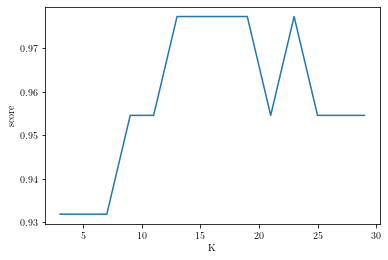

--------------------------------------------
dataset      : realistic_fake 
size         : 1000
train/test   : 700/300 (70.0/30.0)


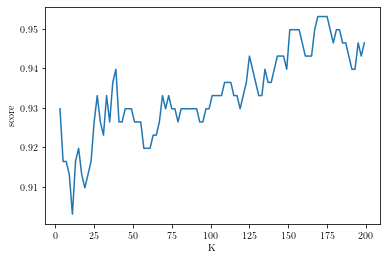

In [4]:
dataset_names = ['iris', 'realistic_fake']
K_max_vec     = [31, 201]
seed          = 1
test_ratio    = 0.3

for i in range(0, len(dataset_names)):
    dataset_name = dataset_names[i]
    dataset = lcd.LoadData(dataset_name, test_ratio=test_ratio, seed=seed) 
    xtrain  = dataset['xtrain']
    ytrain  = dataset['ytrain']
    xtest   = dataset['xtest']
    ytest   = dataset['ytest']
    
    # train for different values of K
    K_max      = K_max_vec[i]
    K_vec      = list(i for i in range(3,K_max,2))
    score_vec  = np.zeros(len(K_vec))
    for i in range(0,len(K_vec)):
        K       = K_vec[i]
        neigh   = KNeighborsClassifier(n_neighbors=K)
        neigh.fit(xtrain, ytrain)
        score_vec[i] = neigh.score(xtest, ytest)
    
    print('--------------------------------------------')
    InfoDataset(dataset)
    plt.figure()
    plt.plot(K_vec, score_vec)
    plt.xlabel('K')
    plt.ylabel('score')
    plt.show()


## Score for different values of K and Nsample for mutually_exclusive

In [5]:
dataset_name = 'realistic_fake'
K_max        = 204
K_step       = 8
seed         = 1
test_ratio   = 0.3
#Nsamples     = [500, 1000, 2000, 4000, 8000, 16000, 32000]
Nsamples     = [500, 1000, 2000, 4000, 8000]

K_vec     = list(i for i in range(3,K_max,K_step))
score_mtr = np.zeros((len(Nsamples), len(K_vec)))
times_vec = np.zeros(len(Nsamples))
for j in range(0,len(Nsamples)):
    Nsample = Nsamples[j]
    
    t0 = time.perf_counter()
    dataset = lcd.LoadData(dataset_name, test_ratio=test_ratio, seed=seed, Nsample=Nsample) 
    xtrain  = dataset['xtrain']
    ytrain  = dataset['ytrain']
    xtest   = dataset['xtest']
    ytest   = dataset['ytest']
    
    # train for different values of K
    
    score_vec  = np.zeros(len(K_vec))
    for i in range(0,len(K_vec)):
        K       = K_vec[i]
        neigh   = KNeighborsClassifier(n_neighbors=K)
        neigh.fit(xtrain, ytrain)
        score_vec[i] = neigh.score(xtest, ytest)
    
    print('--------------------------------------------')
    score_mtr[j][:] = score_vec
    InfoDataset(dataset) 
    times_vec[j] = time.perf_counter()-t0
    print('elapsed time : {:.1f}'.format(times_vec[j]), 's')

--------------------------------------------
dataset      : realistic_fake 
size         : 500
train/test   : 350/150 (70.0/30.0)
elapsed time : 0.3 s
--------------------------------------------
dataset      : realistic_fake 
size         : 1000
train/test   : 700/300 (70.0/30.0)
elapsed time : 0.5 s
--------------------------------------------
dataset      : realistic_fake 
size         : 2000
train/test   : 1400/600 (70.0/30.0)
elapsed time : 1.1 s
--------------------------------------------
dataset      : realistic_fake 
size         : 4000
train/test   : 2800/1200 (70.0/30.0)
elapsed time : 2.6 s
--------------------------------------------
dataset      : realistic_fake 
size         : 8000
train/test   : 5600/2400 (70.0/30.0)
elapsed time : 6.8 s
--------------------------------------------
dataset      : realistic_fake 
size         : 16000
train/test   : 11200/4800 (70.0/30.0)
elapsed time : 17.9 s


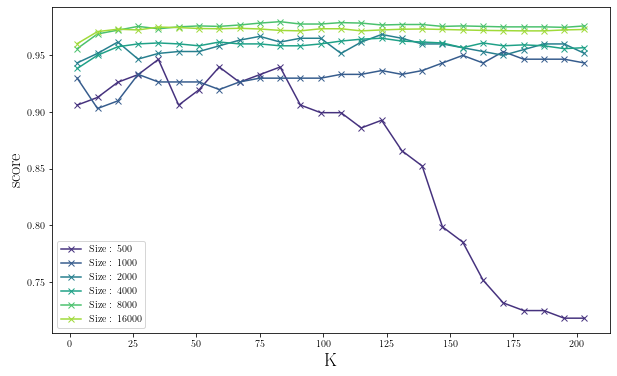

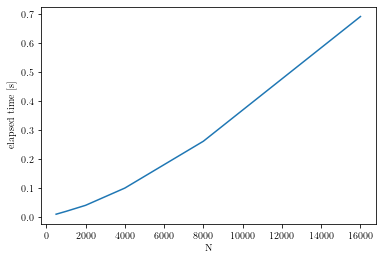

In [6]:
# Plots 
plt.figure(2, figsize=(10, 6))
colors = sns.color_palette("viridis",len(Nsamples))
for j in range(0,len(score_mtr)):
    score_vec = score_mtr[j][:];
    plt.plot(K_vec, score_vec, marker = 'x', color = colors[j], label = 'Size : '+str(Nsamples[j]))
plt.xlabel('K', fontsize = 18)
plt.ylabel('score', fontsize = 18)
plt.legend()
plt.show()

plt.figure
plt.plot(Nsamples, times_vec/len(K_vec))
plt.xlabel('N')
plt.ylabel('elapsed time [s]')
plt.show()

## Stochastic evaluation of the score on realistic_fake

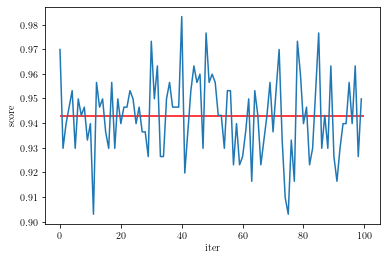

--------------------------------------------
Nsample    : 1000
mean score : 0.943
min  score : 0.903
max  score : 0.983


In [7]:
K            = 25
seed         = -1 # switch-off fixed seed
test_ratio   = 0.3
Nevaluations = 100
Nsample      = 1000

neigh     = KNeighborsClassifier(n_neighbors=K)
score_vec = np.zeros(Nevaluations)
iters     = list(i for i in range(0,Nevaluations))
for i in range(0, Nevaluations):
    dataset = lcd.LoadData('realistic_fake', test_ratio=test_ratio, seed=seed, Nsample=Nsample) 
    xtrain  = dataset['xtrain']
    ytrain  = dataset['ytrain']
    xtest   = dataset['xtest']
    ytest   = dataset['ytest']
    neigh.fit(xtrain, ytrain)
    score_vec[i] = neigh.score(xtest, ytest)
        
mean_score = np.mean(score_vec)
plt.figure()
plt.plot(iters, score_vec)
plt.hlines(mean_score, 0, Nevaluations, 'r')
plt.xlabel('iter')
plt.ylabel('score')
plt.show()

print('--------------------------------------------')
print('Nsample    :', Nsample)
print('mean score : {:.3f}'.format(mean_score))
print('min  score : {:.3f}'.format(np.min(score_vec)))
print('max  score : {:.3f}'.format(np.max(score_vec)))

## Test on standard CSV data

In [2]:
def extractData(filename):
    lst=[]
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            lst.append(row)
    data=np.array(lst, dtype=float)
    return data

def writeResult(filename, data):
    with open(filename, 'w') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=',')
        for row in data:
            spamwriter.writerow(row)

/home/simone/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8397679535907181


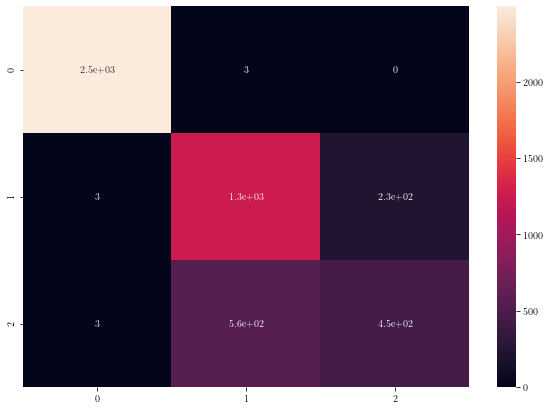

[[2495    3    0]
 [   3 1254  229]
 [   3  563  449]]
------------------------------------------------


/home/simone/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8163632726545309


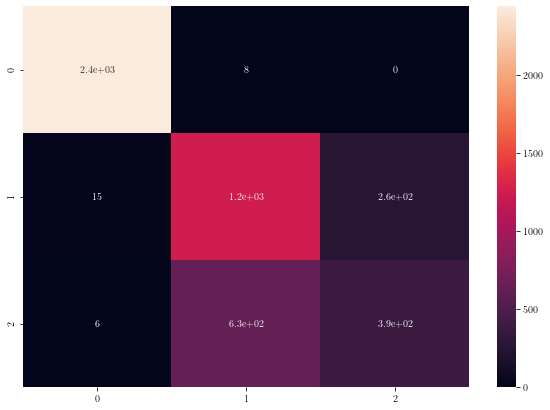

[[2441    8    0]
 [  15 1250  259]
 [   6  630  390]]
------------------------------------------------


/home/simone/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7995599119823965


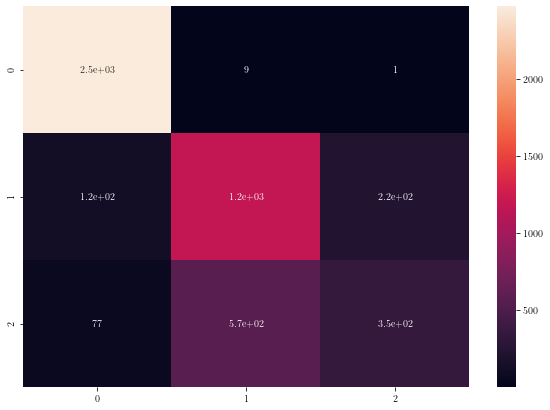

[[2470    9    1]
 [ 122 1181  224]
 [  77  569  346]]
------------------------------------------------


In [31]:
#Do this for every set and version of the csv available
for i in range(0,3):
    data = extractData('../NN_results/NN_set1_v'+str(i)+'.csv')
    labels = extractData('../DataFullProcess/class_v'+str(i)+'.csv') #this is mantained through sets and methods, only change when you cahnge versions
    xtrain=data[:10000]
    ytrain=labels[:10000]
    xtest=data[10000:-1]
    ytest=labels[10000:-1]

    #train your algorithm here.
    K     = 25
    neigh = KNeighborsClassifier(n_neighbors=K)
    neigh.fit(xtrain, ytrain)

    score_i = neigh.score(xtest,ytest)
    print(score_i)
    
    predict = neigh.predict(xtest)
    cm = confusion_matrix(ytest, predict)
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=True)
    plt.show()
    print(cm)
    print('------------------------------------------------')
    #then test the xtest and compute accuracy with the known labels
    #QUESTION: 
    # Do you at least get to separate events with and without NS? 
    # (this is, can you tell accurately when events belong to class 0, or class 1/2? 
    # Or do all of them get mixed?